In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


## Data Quality Analysis and Pre-Processing

In [ ]:
# Load dataset directly from the URL
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)

In [ ]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Counts for {column}:")
        print(df[column].value_counts())
        print()


Counts for hours_per_week_bin:
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

Counts for occupation_bin:
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

Counts for msr_bin:
c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

Counts for capital_gl_bin:
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

Counts for race_sex_bin:
c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

Counts for education_num_bin:
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

Counts for education_bin:
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: educ

## Decision Tree Classifier Model

In [ ]:
# Split the data based on the 'flag' column
train_data = df[df['flag'] == 'train']
test_data = df[df['flag'] == 'test']

In [ ]:
# filter data to get accurate predetermined train test `variables
train_data_filtered = train_data[train_data['flag'] == 'train']

In [ ]:
# Split the filtered training data into features and labels
X_train = train_data_filtered.drop(['flag', 'y'], axis=1)
y_train = train_data_filtered['y']

X_test = test_data[test_data['flag'] == 'test'].drop(['flag', 'y'], axis=1)
y_test = test_data[test_data['flag'] == 'test']['y']

In [ ]:
# Encoding categorical variables in the training and test sets
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        # Fit the encoder on the training data
        label_encoder.fit(X_train[column])
        # Transform both training and test data
        X_train[column] = label_encoder.transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])

In [ ]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [ ]:
# Check for the sklearn version
import sklearn
print(sklearn.__version__)

1.2.2


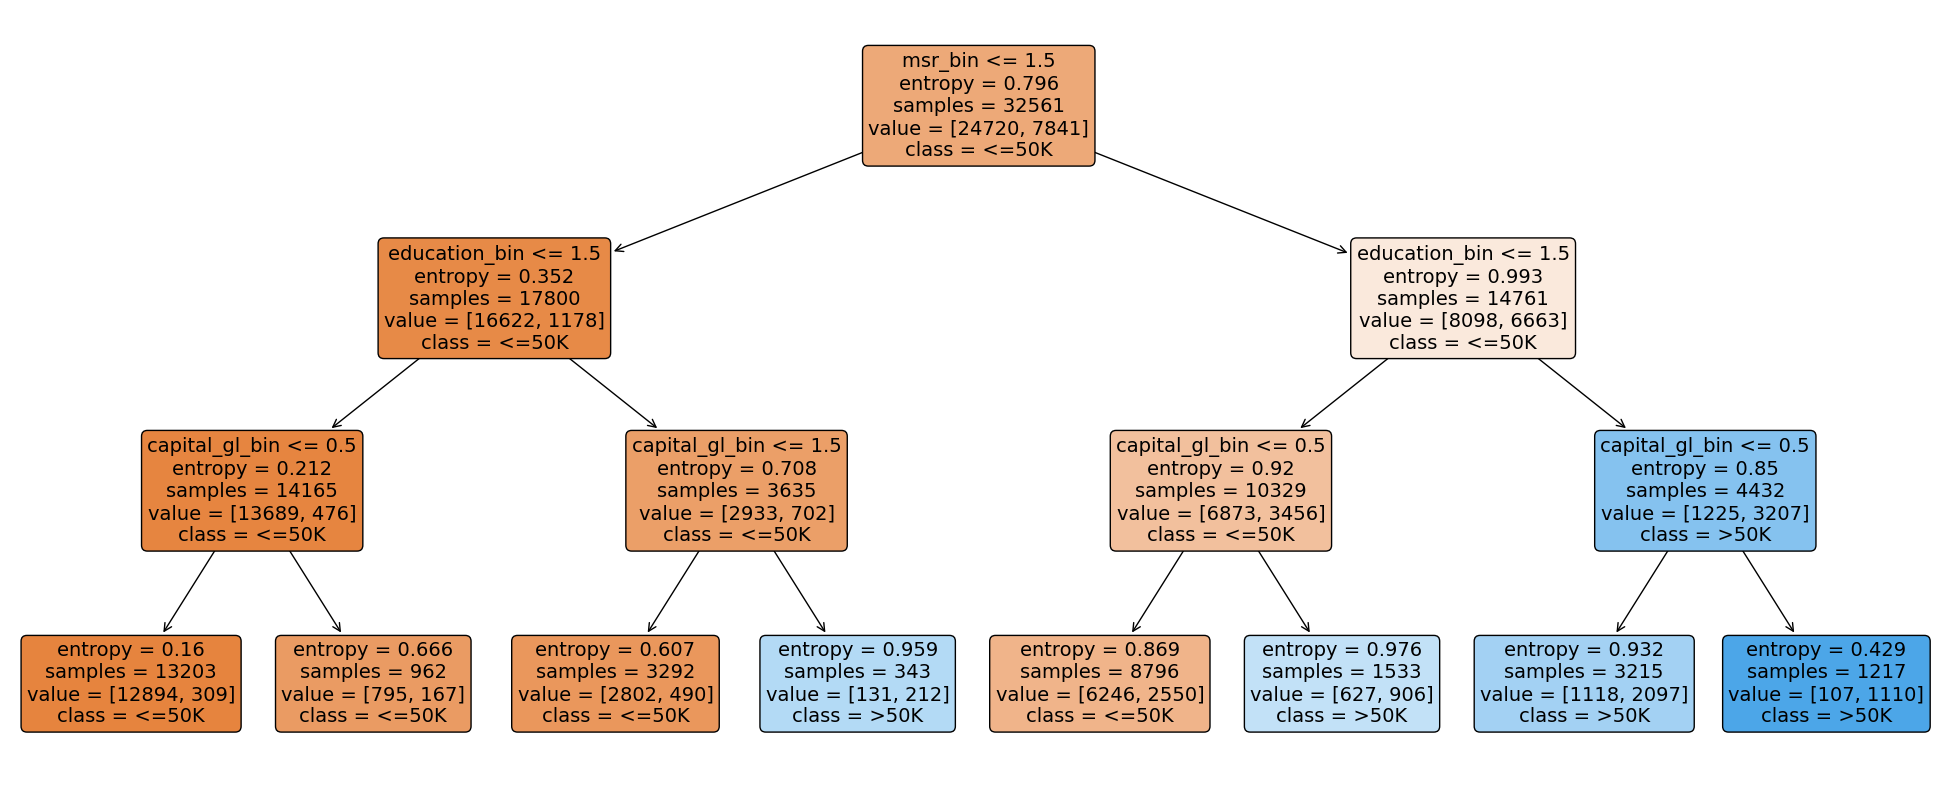

In [ ]:
plt.figure(figsize=(25, 10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['<=50K', '>50K'],
              filled=True, rounded=True, fontsize=14)

# Finding Optimal Value of a Key Ensemble Method Hyperparameter

<Axes: >

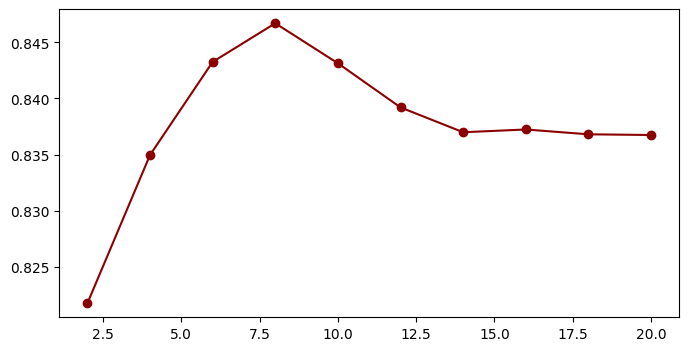

In [ ]:
# Accuracy vs n_estimators
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  dtree = DecisionTreeClassifier(max_depth=trees, random_state=101)
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred", marker="o")

<Axes: >

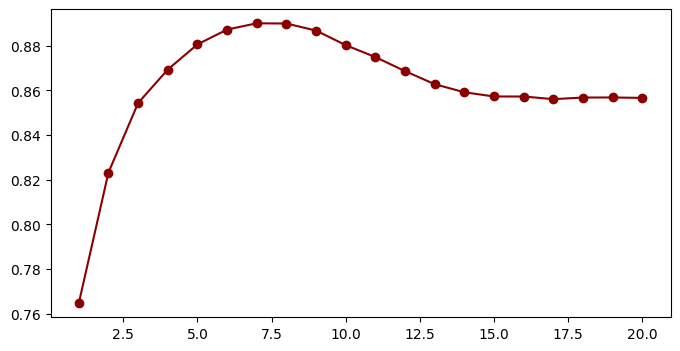

In [ ]:
# AUC vs n_estimators
auc_scores = []
max_depth_values = range(1,21)
for max_depth in max_depth_values:
    dtree = DecisionTreeClassifier(max_depth=max_depth, random_state=101)
    dtree.fit(X_train, y_train)
    y_pred_proba = dtree.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

plt.figure(figsize=(8,4))
pd.Series(auc_scores, max_depth_values).plot(color="darkred", marker="o")

## Building a Random Forest Model and Plotting Accuracy and AUC

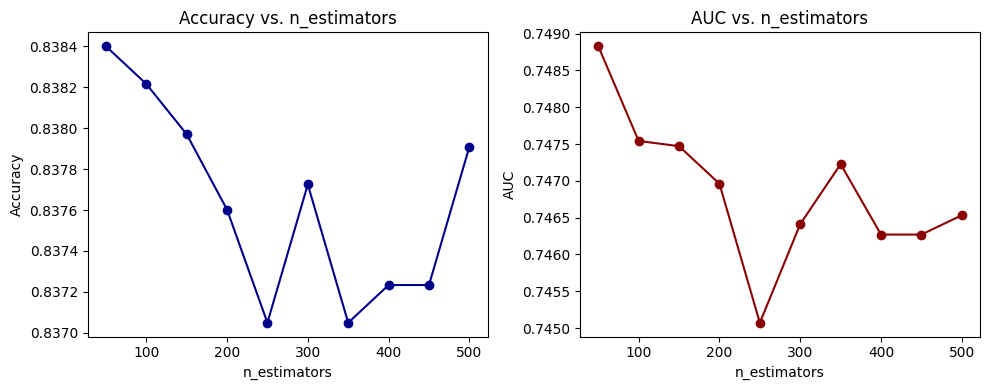

In [ ]:
# Building the model and evaluating accuracy and AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_scores = []
auc_scores = []

for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=101)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, accuracy_scores, marker='o', color='darkblue')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, auc_scores, marker='o', color='darkred')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators')

plt.tight_layout()
plt.show()

In [ ]:
# Despite increasing the number of estimators, both accuracy and AUC do not show significant improvement.
# The model's ability to discriminate between the classes does not improve with additional estimators.

# Increasing the number of estimators in the RF model does not lead to better predictive performance

# Building AdaBoost, Gradient Boost, and XGB

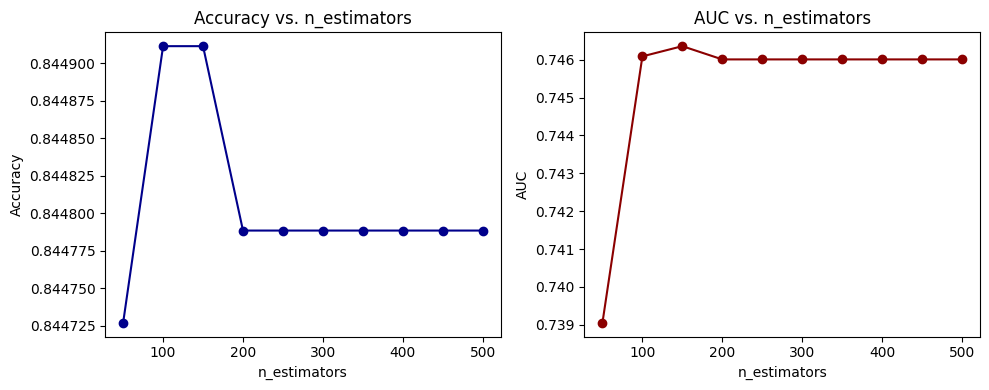

In [ ]:
# Building the model and evaluating accuracy and AUC
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_scores = []
auc_scores = []

for n_estimator in n_estimators:
    clf = AdaBoostClassifier(n_estimators=n_estimator, random_state=101)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, accuracy_scores, marker='o', color='darkblue')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, auc_scores, marker='o', color='darkred')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators')

plt.tight_layout()
plt.show()

The performance metrics both increase to around 100 estimators while AUC slightly increases again then plateaus and accuracy plateaus and quickly drops off.

150 is the optimal number of estimators.

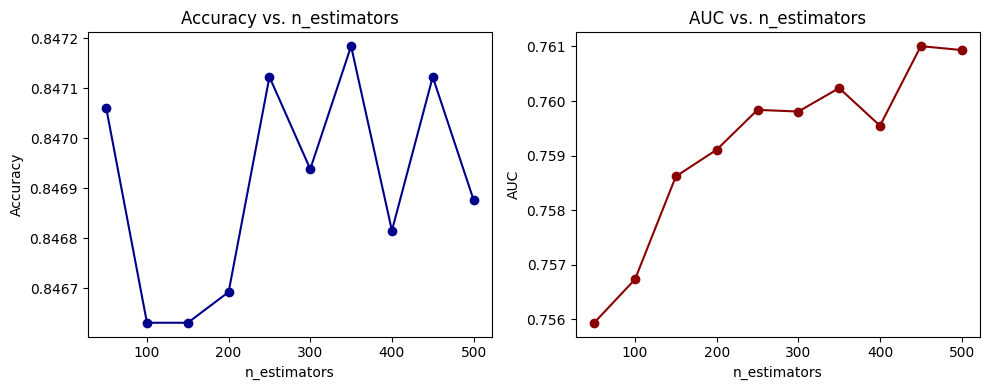

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Building the model and evaluating accuracy and AUC

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_scores = []
auc_scores = []

for n_estimator in n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=n_estimator, random_state=101)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, accuracy_scores, marker='o', color='darkblue')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, auc_scores, marker='o', color='darkred')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators')

plt.tight_layout()
plt.show()

As the number of estimators grows, accuracy increases on a fluctuatung path, while AUC increases fairly steadily.

450 or 350 estimators optimizes both.

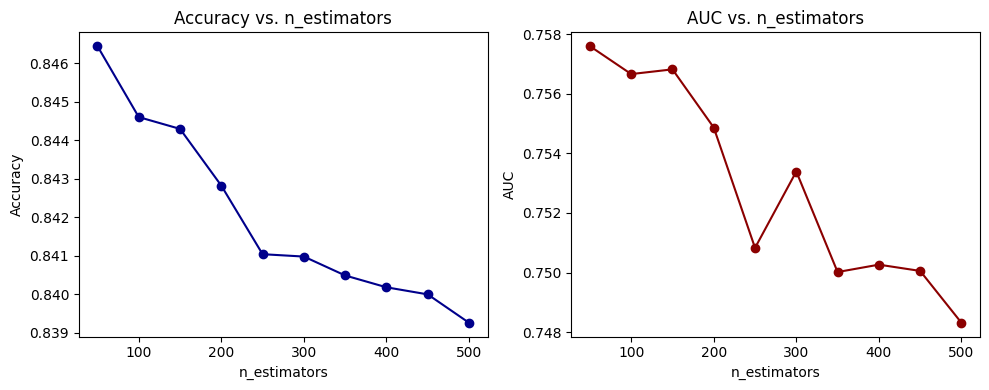

In [ ]:
from xgboost import XGBClassifier

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_scores = []
auc_scores = []

for n_estimator in n_estimators:
    xgb = XGBClassifier(n_estimators=n_estimator, random_state=101)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, accuracy_scores, marker='o', color='darkblue')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, auc_scores, marker='o', color='darkred')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators')

plt.tight_layout()
plt.show()


Both performance measures decrease steadily with more estimators.

50 estimators

## Compare Performance

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
classifiers = {
    'XGBoost': XGBClassifier,
    'AdaBoost': AdaBoostClassifier,
    'GradientBoost': GradientBoostingClassifier,
    'RandomForest': RandomForestClassifier
}

# Create an empty DataFrame
results_df = pd.DataFrame(index=['Accuracy', 'AUC'], columns=classifiers.keys())

for clf_name, clf_class in classifiers.items():
    best_accuracy = 0
    best_auc = 0
    best_n_estimator = 0

    for n_estimator in n_estimators:
        clf = clf_class(n_estimators=n_estimator, random_state=101)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Update the best scores and parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimator = n_estimator

        if auc > best_auc:
            best_auc = auc

    # Update the DataFrame with the best scores
    results_df.loc['Accuracy', clf_name] = best_accuracy
    results_df.loc['AUC', clf_name] = best_auc

# Display the DataFrame
print(results_df)

           XGBoost  AdaBoost GradientBoost RandomForest
Accuracy  0.846447  0.844911      0.847184     0.838401
AUC       0.757599  0.746357      0.761005      0.74883
